In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

2024-08-07 21:53:36.723642: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_train.npy') 
y_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_train.npy')  
x_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_test.npy')    
y_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_test.npy') 

In [3]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

In [4]:
model = Sequential()
model.add(LSTM(128, input_shape=(19, 500), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

/Users/sailaharimullapudi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.4799 - loss: 1.1234 - val_accuracy: 0.6254 - val_loss: 0.9066
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6385 - loss: 0.8808 - val_accuracy: 0.6795 - val_loss: 0.8308
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7065 - loss: 0.7724 - val_accuracy: 0.6994 - val_loss: 0.7934
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7225 - loss: 0.7321 - val_accuracy: 0.7051 - val_loss: 0.7778
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7448 - loss: 0.6930 - val_accuracy: 0.7194 - val_loss: 0.7209
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7583 - loss: 0.6482 - val_accuracy: 0.7493 - val_loss: 0.6887
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7637 - loss: 0.6221 - val_accuracy: 0.7393 - val_loss: 0.6705
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7926 - loss: 0.5664 - val_accuracy: 0.7564 - v

In [7]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Accuracy: {accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8410 - loss: 0.5150
Test Accuracy: 0.8228498101234436


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


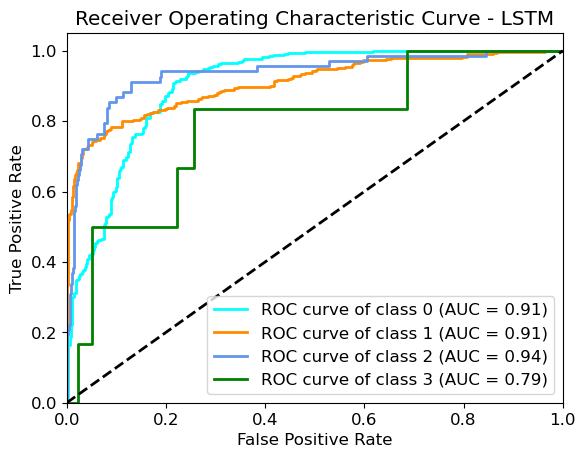

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_pred = model.predict(x_test)

n_classes = y_test_encoded.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - LSTM')
plt.legend(loc="lower right")
plt.show()

y_pred shape: (779, 4)
y_test_encoded shape: (779, 4)


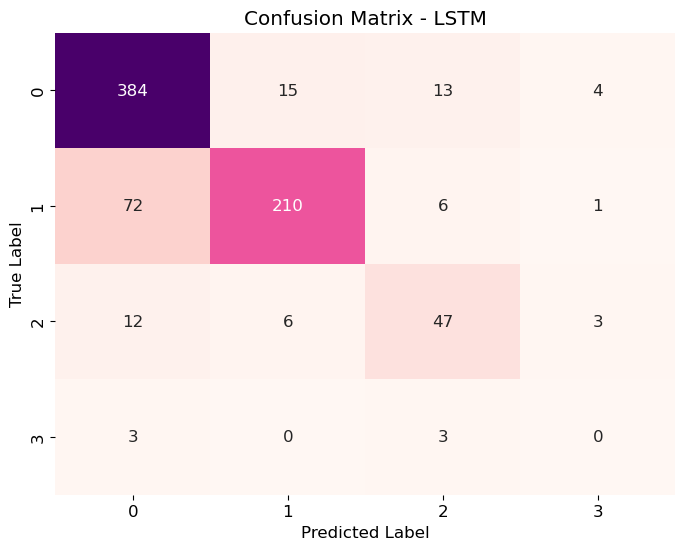

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"y_pred shape: {y_pred.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM')
plt.show()

In [42]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print(report)

accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

     Class 0       0.82      0.92      0.87       416
     Class 1       0.91      0.73      0.81       289
     Class 2       0.68      0.69      0.69        68
     Class 3       0.00      0.00      0.00         6

    accuracy                           0.82       779
   macro avg       0.60      0.59      0.59       779
weighted avg       0.83      0.82      0.82       779

Accuracy: 0.8228498074454429


In [43]:
# log loss

from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss}')

Log Loss: 0.5466463830614811


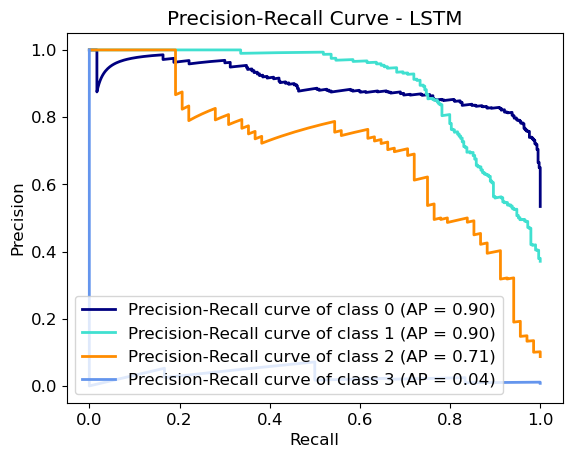

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test_encoded[:, i], y_pred[:, i])

plt.figure()
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LSTM')
plt.legend(loc="lower left")
plt.show()

In [47]:
import seaborn as sns
import pandas as pd

metrics_report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], output_dict=True)

report_df = pd.DataFrame(metrics_report).transpose().reset_index()

clean_report = report_df[(report_df['index'] == "Class 0") |\
                         (report_df['index'] == "Class 1") |\
                         (report_df['index'] == "Class 2") |\
                         (report_df['index'] == "Class 3")]

clean_report.head()

,index,precision,recall,f1-score,support
0,Class 0,0.815287,0.923077,0.865840,416.0
1,Class 1,0.909091,0.726644,0.807692,289.0
2,Class 2,0.681159,0.691176,0.686131,68.0
3,Class 3,0.000000,0.000000,0.000000,6.0


In [48]:
keep_index = ["Class 0", "Class 1", "Class 2", "Class 3"]

heatmap_df = pd.DataFrame(metrics_report).transpose()
heatmap_df_idx = heatmap_df[heatmap_df.index.isin(keep_index)]
heatmap_df__cln = heatmap_df_idx.drop(columns=['support'])
heatmap_df__cln.head()

,precision,recall,f1-score
Class 0,0.815287,0.923077,0.865840
Class 1,0.909091,0.726644,0.807692
Class 2,0.681159,0.691176,0.686131
Class 3,0.000000,0.000000,0.000000


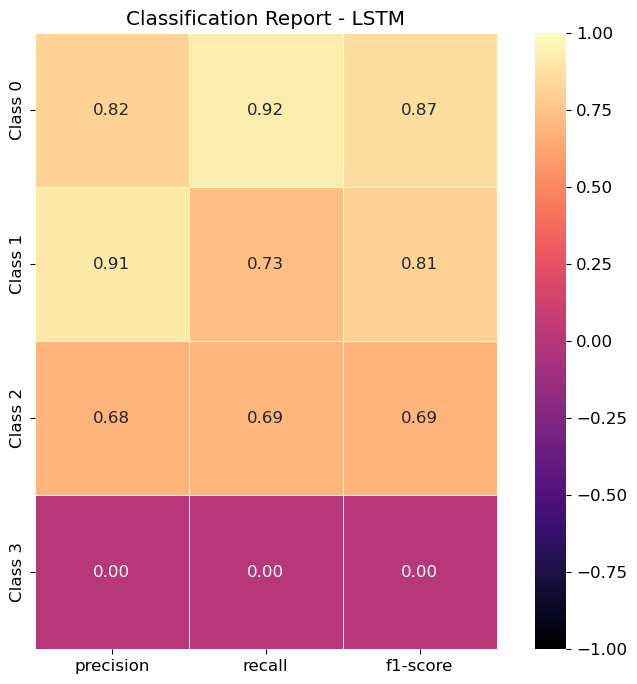

In [55]:
# Create an annotated heatmap

report_df = pd.DataFrame(metrics_report).transpose()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_df__cln, cmap = 'magma', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Classification Report - LSTM')
plt.show()